# SynthEval user guide
This notebook demonstrates how the included software is used for evaluating synthetic data.

The example is based on the Palmer Archipelago penguin data from kaggle (https://www.kaggle.com/datasets/parulpandey/palmer-archipelago-antarctica-penguin-data?select=penguins_size.csv), and the synthetic version is generated using DataSynthesizer with default parameters.

The current version of the code requires the following imports;

In [1]:
import pandas as pd

from syntheval import SynthEval

In [2]:
### Now we load and prepare the data
load_dir = 'example/'
filename = 'penguins'

df_real = pd.read_csv(load_dir + filename + '_train.csv')
df_fake = pd.read_csv(load_dir + filename + '_BN_syn.csv').round(1) #be sure to round to an appropriate number of decimals

### Testing data is not required, but the usability analysis will be more complete if it is included. 
df_test = pd.read_csv(load_dir + filename + '_test.csv')

Finally, before running the evaluator, we require to specify the categorical columns, and the target column for classification tests. In a future version, detection of categorical columns should be done automatically. 

In [3]:
### Specify columns
class_cat_col = ['species','island','sex']

class_lab_col = 'species'

In [4]:
### First SynthEval object is created with the real data and the optional hold-out data
evaluator = SynthEval(df_real,hold_out=df_test,cat_cols=class_cat_col)

evaluator.F1_type = 'macro' # The default setting uses accuracy (micro F1 score) for usability, here we change to macro F1 score to better facilitate class imbalance.

SynthEval: synthetic data read successfully
SynthEval: fast evaluation complete
 +------------------------------------------+
 | Avg. KS-dist         : 0.0313 SE(0.0033) |
 | frac. of sig. tests  : 0                 |
 | Avg. H-dist          : 0.2178 SE(0.0786) |
 | Normed DCR           : 0.6785 SE(0.0429) |
 +------------------------------------------+



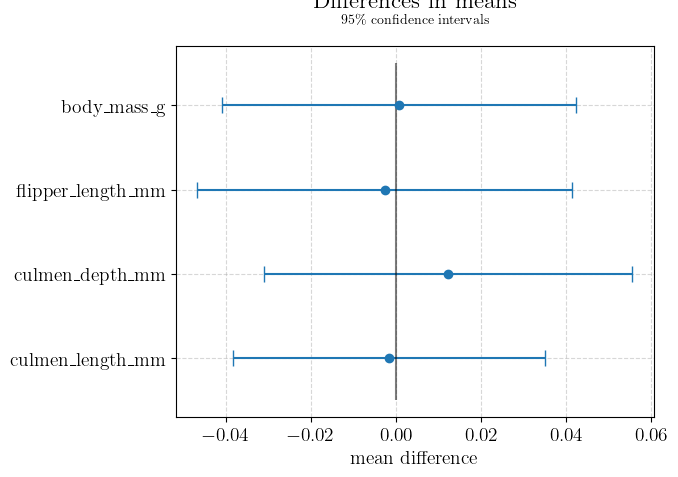

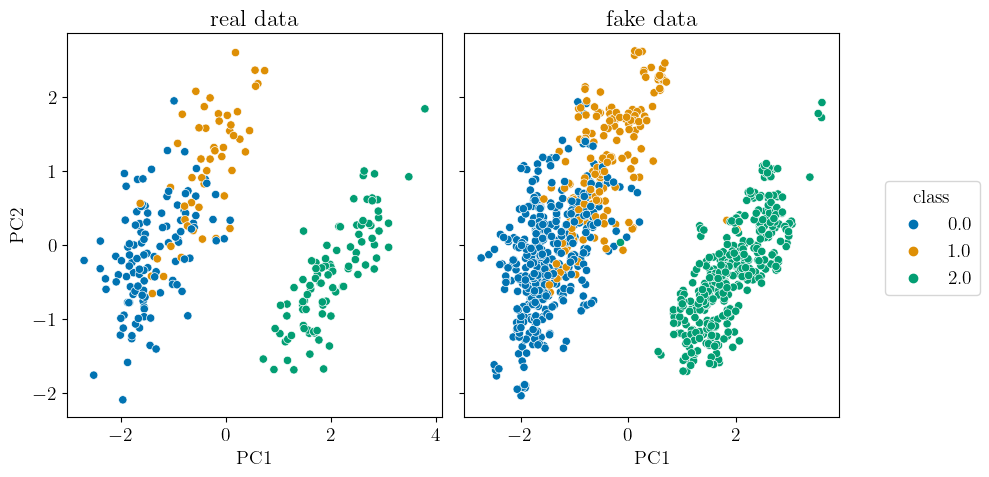

In [5]:
### Next we can run a fast version of the evaluation on a set of fake samples (intended for ongoing evaluation during training or prior to full benchmark) 
ks_dist, ks_frac, h_dist, dcr = evaluator.fast_eval(df_fake,class_lab_col)

SynthEval: synthetic data read successfully
EARL ran sucessfully
QUAL ran sucessfully
RESM ran sucessfully


USEA: 100%|██████████| 5/5 [00:02<00:00,  1.71it/s]


USEA ran sucessfully

SynthEval Results 

Quality metrics:
 metric description                            value   error
 +---------------------------------------------------------------+
 | Correlation matrix difference (num only) :   0.1052           |
 | Pairwise mutual information difference   :   0.5585           |
 | Kolmogorov–Smirnov test                                       |
 |   -> avg. Kolmogorov–Smirnov distance    :   0.0313  0.0033   |
 |   -> avg. Kolmogorov–Smirnov p-value     :   0.7792  0.0631   |
 |   -> # significant tests at a=0.05       :   0                |
 |   -> fraction of significant tests       :   0.0000           |
 +---------------------------------------------------------------+
Resemblance metrics:
 +---------------------------------------------------------------+
 | Average confidence interval overlap      :   0.6825  0.0630   |
 |   -> # non-overlapping COIs at 95%       :   0                |
 |   -> fraction of non-overlapping CIs     :   0.0000 

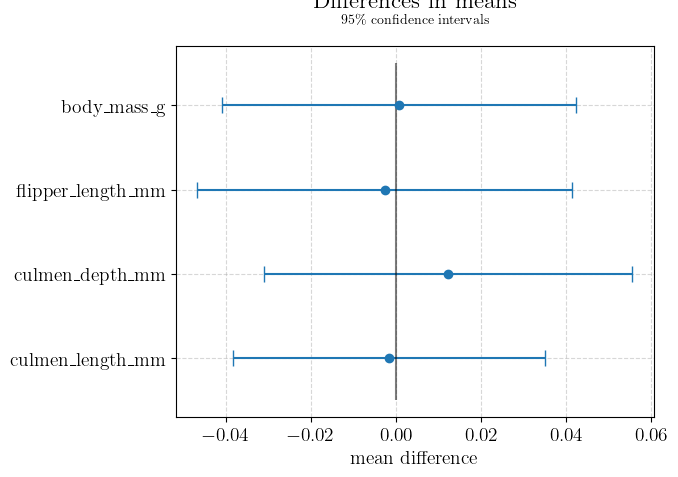

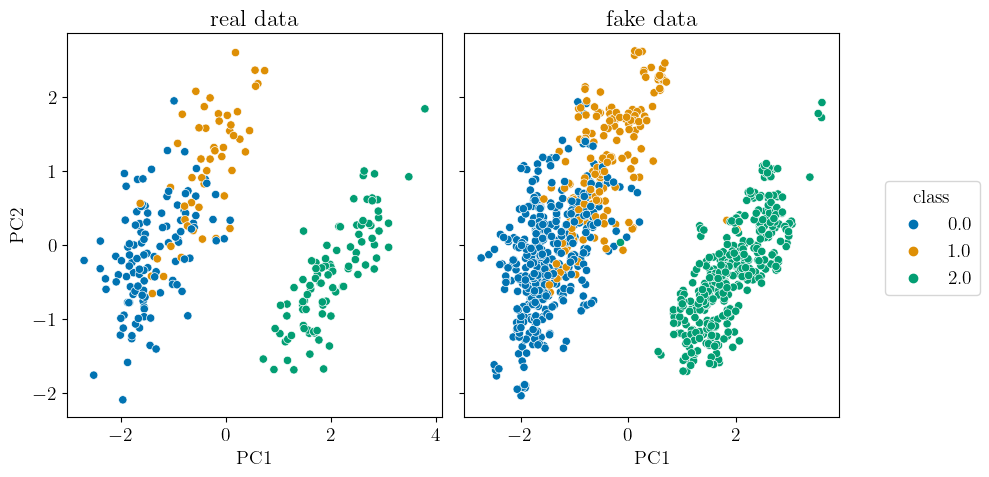

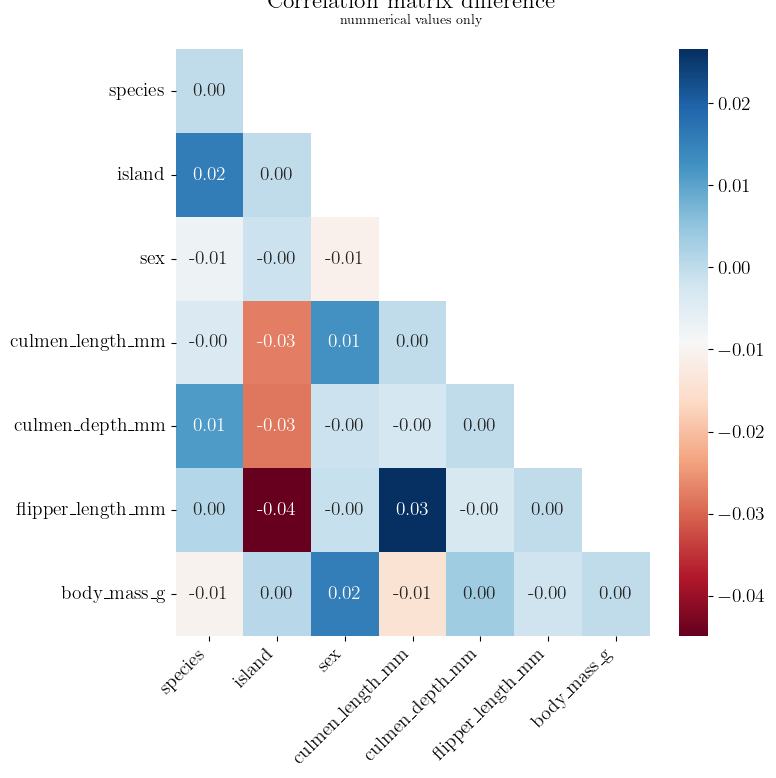

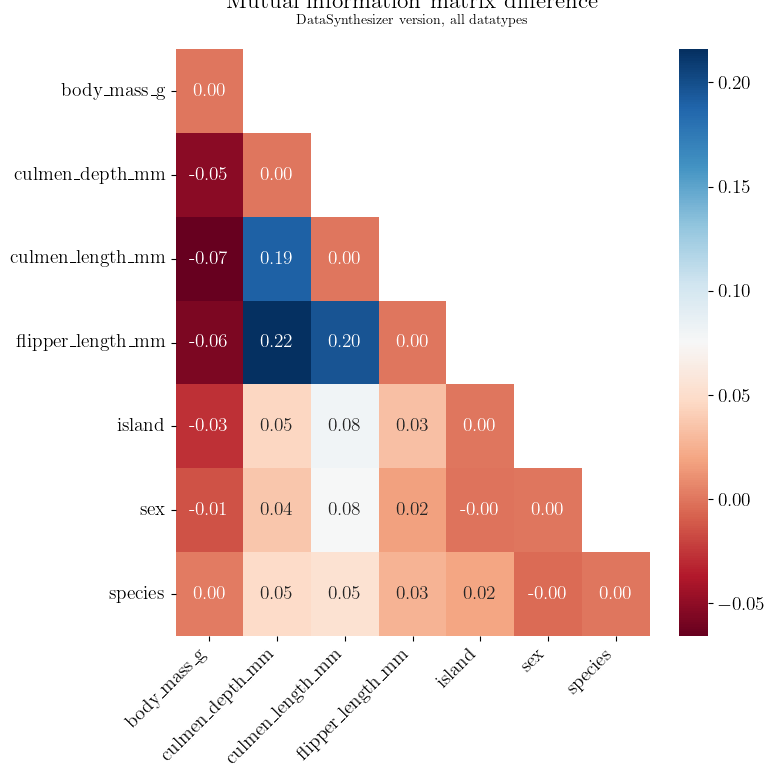

In [6]:
### The full version of the benchmark is run using the full_eval() method, again with a set of fake samples
evaluator.full_eval(df_fake,class_lab_col)